In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec
import rioxarray
from rasterio.enums import Resampling

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

In [5]:
dir = "/data/home/hamiddashti/hamid/nasa_above/greeness/"

in_dir = dir + ("data/processed_data/landsat/mosaic/")
out_dir = dir + ("data/processed_data/landsat/resampled/")

target_image = xr.open_dataset(
    dir +
    "data/processed_data/noaa_nc/lai_fapar/resampled/lai_annual_resample_max_1984_2013.nc"
)["LAI"].isel(time=5)
target_image = target_image.rio.write_crs("EPSG:4326").rename({
    "latitude": "y",
    "longitude": "x"
})

In [6]:
df = pd.read_csv(
    'https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [7]:
df_lai = df.query(
    "activity_id=='CMIP' & variable_id == 'lai' & experiment_id == 'historical'\
          & institution_id=='NCAR' & source_id=='CESM2' & member_id =='r1i1p1f1'"
)

zstore = df_lai.zstore.values[-1]
mapper = fsspec.get_mapper(zstore)
da = xr.open_zarr(mapper, consolidated=True)["lai"]
da.rio.write_crs("epsg:4326", inplace=True)
resampled = da.rio.reproject_match(
    target_image, resampling=Resampling.average
)
var_annual = resampled.groupby("time.year").max("time").rename(
        {"year": "time","x":"lon","y":"lat"}).sel(time=slice("1984","2021"))
var_annual.to_netcdf("../../data/processed_data/cmip/cesm2_ncar_lai_max.nc")

In [82]:
df_lai = df.query(
    "activity_id=='CMIP' & variable_id == 'lai' & experiment_id == 'historical'\
         & member_id =='r1i1p1f1'"
)
df_lai = df_lai.query("source_id=='BCC-CSM2-MR'")
zstore = df_lai.zstore.values[-1]
mapper = fsspec.get_mapper(zstore)
da = xr.open_zarr(mapper, consolidated=True)["lai"]
da.rio.write_crs("epsg:4326", inplace=True)
resampled = da.rio.reproject_match(
    target_image, resampling=Resampling.average
)
var_annual = resampled.groupby("time.year").max("time").rename(
        {"year": "time","x":"lon","y":"lat"}).sel(time=slice("1984","2021"))
var_annual.to_netcdf("../../data/processed_data/cmip/cesm2_BCC_lai_max.nc")

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
42584,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Lmon,lai,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181114


In [92]:
df_lai = df.query(
    "activity_id=='CMIP' & variable_id == 'lai' & experiment_id == 'historical'\
          "
)
df_lai = df_lai.query("source_id=='CanESM5'&member_id =='r1i1p1f1'")
zstore = df_lai.zstore.values[-1]
mapper = fsspec.get_mapper(zstore)
da = xr.open_zarr(mapper, consolidated=True)["lai"]
da.rio.write_crs("epsg:4326", inplace=True)
resampled = da.rio.reproject_match(
    target_image, resampling=Resampling.average
)
var_annual = resampled.groupby("time.year").max("time").rename(
        {"year": "time","x":"lon","y":"lat"}).sel(time=slice("1984","2021"))
var_annual.to_netcdf("../../data/processed_data/cmip/cesm2_CAN_lai_max.nc")

In [99]:
df_lai = df.query(
    "activity_id=='CMIP' & variable_id == 'lai' & experiment_id == 'historical'\
          "
)
df_lai.query("institution_id=='IPSL'")
df_lai
# df_lai = df_lai.query("source_id=='CanESM5'&member_id =='r1i1p1f1'")
# zstore = df_lai.zstore.values[-1]
# mapper = fsspec.get_mapper(zstore)
# da = xr.open_zarr(mapper, consolidated=True)["lai"]
# da.rio.write_crs("epsg:4326", inplace=True)
# resampled = da.rio.reproject_match(
#     target_image, resampling=Resampling.average
# )
# var_annual = resampled.groupby("time.year").max("time").rename(
#         {"year": "time","x":"lon","y":"lat"}).sel(time=slice("1984","2021"))
# var_annual.to_netcdf("../../data/processed_data/cmip/cesm2_CAN_lai_max.nc")


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9690,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Lmon,lai,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
22355,CMIP,IPSL,IPSL-CM6A-LR,historical,r8i1p1f1,Lmon,lai,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
22664,CMIP,IPSL,IPSL-CM6A-LR,historical,r9i1p1f1,Lmon,lai,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
22972,CMIP,IPSL,IPSL-CM6A-LR,historical,r3i1p1f1,Lmon,lai,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
23281,CMIP,IPSL,IPSL-CM6A-LR,historical,r6i1p1f1,Lmon,lai,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
...,...,...,...,...,...,...,...,...,...,...,...
520587,CMIP,CSIRO,ACCESS-ESM1-5,historical,r40i1p1f1,Lmon,lai,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/hist...,NaN,20210525
520604,CMIP,CSIRO,ACCESS-ESM1-5,historical,r35i1p1f1,Lmon,lai,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/hist...,NaN,20210525
520608,CMIP,CSIRO,ACCESS-ESM1-5,historical,r39i1p1f1,Lmon,lai,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/hist...,NaN,20210525
521087,CMIP,KIOST,KIOST-ESM,historical,r1i1p1f1,Lmon,lai,gr1,gs://cmip6/CMIP6/CMIP/KIOST/KIOST-ESM/historic...,NaN,20210601


On the first run, check the CPU instruction set ... 

15
CPU Vendor:
    AMD         = No
    Intel       = Yes
 
OS Features:
    OS AVX      = Yes
    OS AVX512   = No

Hardware Features:
    MMX         = Yes
    x64         = Yes
    ABM         = Yes
    RDRAND      = Yes
    RDSEED      = No
    BMI1        = Yes
    BMI2        = Yes
    ADX         = No
    MPX         = No
    PREFETCHW   = No
    PREFETCHWT1 = No
    RDPID       = No
    GFNI        = No
    VAES        = No

SIMD: 128-bit
    SSE         = Yes
    SSE2        = Yes
    SSE3        = Yes
    SSSE3       = Yes
    SSE4a       = No
    SSE4.1      = Yes
    SSE4.2      = Yes
    AES-NI      = Yes
    SHA         = No

SIMD: 256-bit
    AVX         = Yes
    XOP         = No
    FMA3        = Yes
    FMA4        = No
    AVX2        = Yes

SIMD: 512-bit
    AVX512-F         = No
    AVX512-CD        = No
    AVX512-PF        = No
    AVX512-ER        = No
    AVX512-VL        = No
    AVX512-BW        = No
    A

(<Figure size 1200x600 with 5 Axes>,
 array([<AxesSubplot:xlabel='[]', ylabel='trend'>,
        <AxesSubplot:xlabel='[]', ylabel='Pr(tcp)'>,
        <AxesSubplot:xlabel='[]', ylabel='tOrder'>,
        <AxesSubplot:xlabel='[]', ylabel='slpsgn'>,
        <AxesSubplot:xlabel='time', ylabel='error'>], dtype=object))

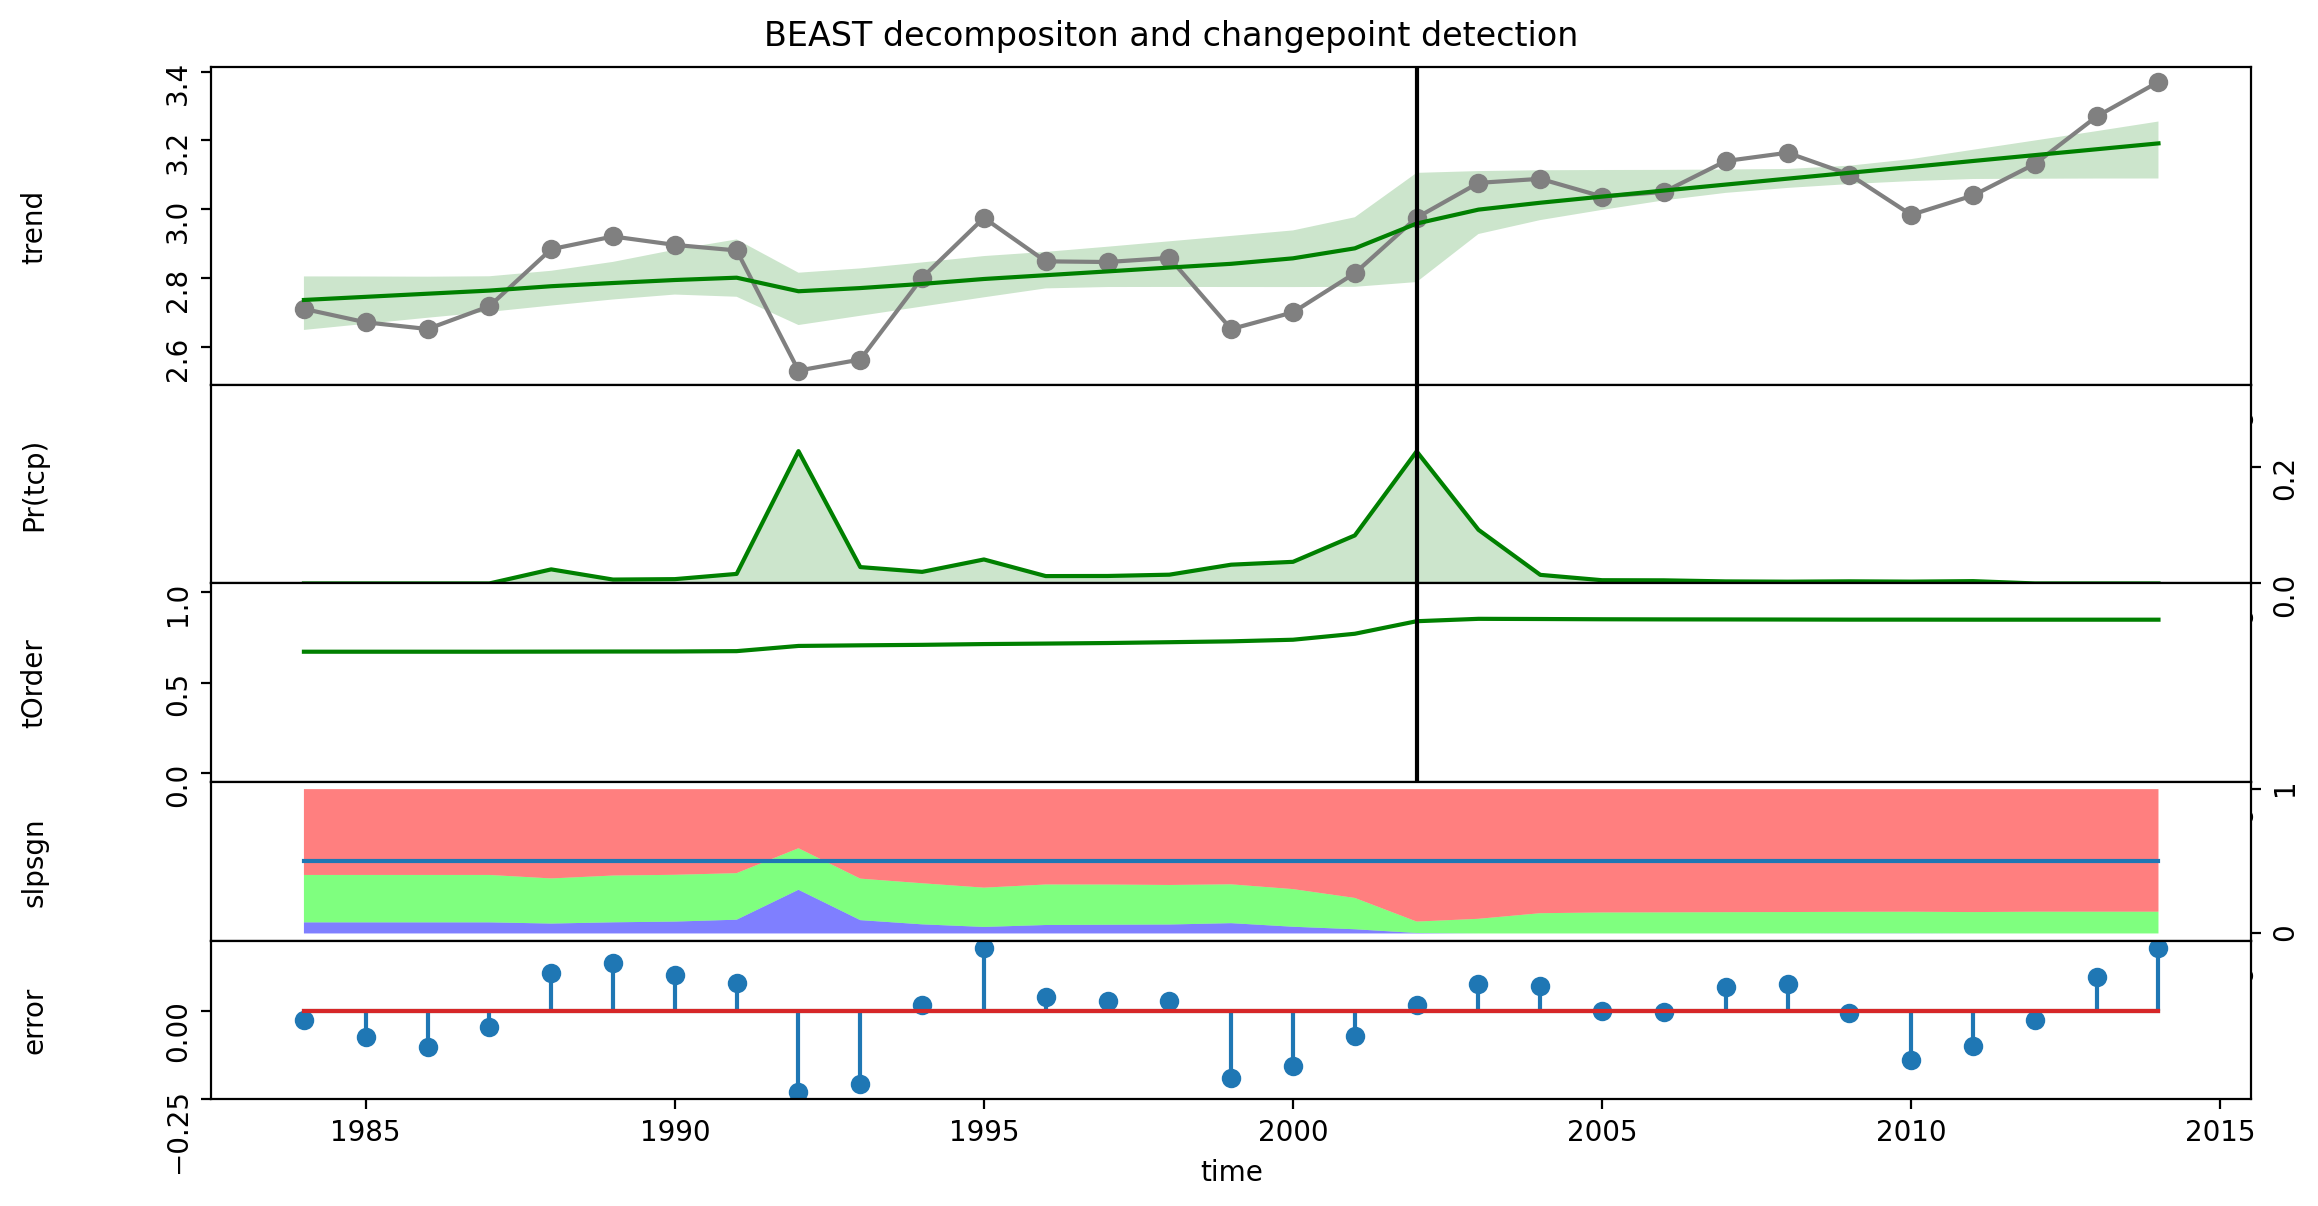

In [8]:
import Rbeast as rb
out1 = rb.beast(var_annual.mean(["lat","lon"]).values,
                                 season="none",
                                 start=1984,
                                 tseg_minlength=3) 
rb.plot(out1)